In [5]:
import numpy as np
import pandas as pd
import sys
import os
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
matplotlib.rcParams['font.family'] = 'Arial'
sns.set_context('poster', font_scale=1.8)
%matplotlib inline
sns.set_context('poster')

In [6]:
df = pd.read_csv('RNA_AU_single_Hbond_X_ray_NMR_final.csv')
# df.head()

In [7]:
df['2nd_struct'].value_counts()

junction               131
junction-1             117
junction-2              69
tertiary                39
terminal                28
junction-3              14
terminal-1              13
duplex                   6
terminal-2               6
terminal-3               5
A-US5                    3
registration shift?      2
next to US5              1
Name: 2nd_struct, dtype: int64

In [14]:
drop = np.where(df["2nd_struct"] == 'registration shift?')

In [15]:
np.where(df["2nd_struct"] == 'next to US5')

(array([113]),)

In [16]:
df_filtred = df.drop(drop)

ValueError: Index data must be 1-dimensional

In [9]:
df_filtred['2nd_struct'].value_counts()

junction       131
junction-1     117
junction-2      69
tertiary        39
terminal        28
junction-3      14
terminal-1      13
terminal-2       6
duplex           6
terminal-3       5
A-US5            3
next to US5      1
Name: 2nd_struct, dtype: int64

In [10]:
# remove all nan rows
df_filtred = df_filtred.drop(df_filtred.index[df_filtred.isnull().all(1)])

In [16]:
df_filtred = df_filtred[~df_filtred['2nd_struct'].isin(['A-US5', 'next to US5'])]

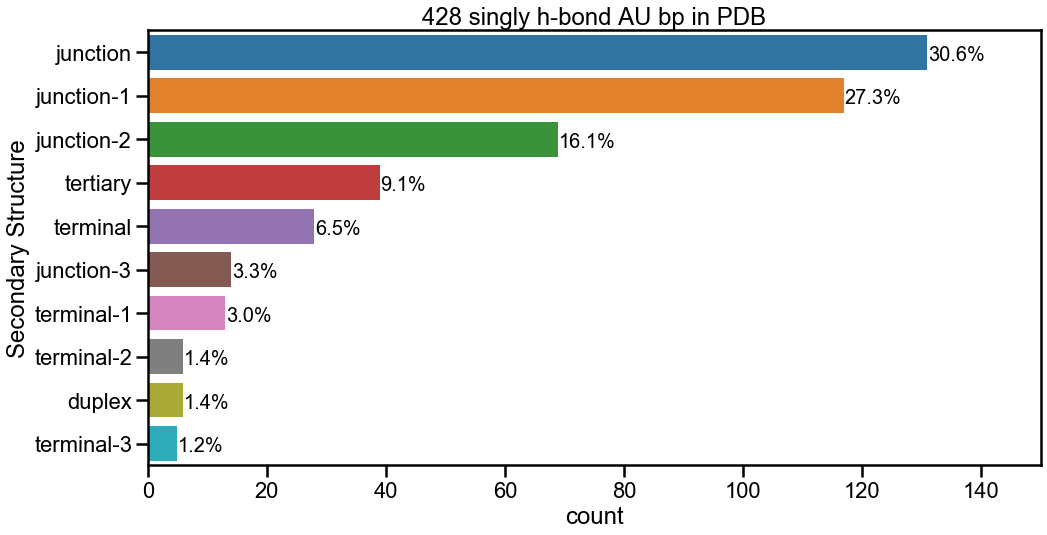

In [17]:
plt.figure(figsize=(16, 8))
ax = sns.countplot(y = '2nd_struct', data = df_filtred, order = df_filtred['2nd_struct'].value_counts().index)
plt.ylabel('Secondary Structure')
plt.xlim(0, 150)

total = float(len(df_filtred['2nd_struct']))
for p in ax.patches:
        percentage = '{:.1%}'.format(p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.1
        y = p.get_y() + p.get_height() - 0.22
        ax.annotate(percentage, (x, y), size = 20)
plt.title('{:0.0f} singly h-bond AU bp in PDB'.format(total))

plt.savefig('PDB_survey_result.pdf', dpi = 300, transparent=True)